<a href="https://colab.research.google.com/github/arthurcamargotradingcomdados/tutoriais_publicos/blob/main/Compara%C3%A7ao_Metodos_Otimizacao_HRP_HERC_30_03_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aula ministrada por: https://www.linkedin.com/in/arthur-camargo/

##Instalando Bibliotecas

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip uninstall matplotlib
!pip install matplotlib

Found existing installation: matplotlib 3.7.1
Uninstalling matplotlib-3.7.1:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/matplotlib-3.7.1-py3.9-nspkg.pth
    /usr/local/lib/python3.9/dist-packages/matplotlib-3.7.1.dist-info/*
    /usr/local/lib/python3.9/dist-packages/matplotlib/*
    /usr/local/lib/python3.9/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.9/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.9/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.9/dist-packages/pylab.py
Proceed (Y/n)? Y
  Successfully uninstalled matplotlib-3.7.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 66.2 MB/s eta 0:00:00


In [3]:
exit()

In [1]:
!pip install cvxpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install pybind11

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.3/222.3 KB 4.9 MB/s eta 0:00:00


In [3]:
!pip install riskfolio-lib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.0/220.0 KB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.0/908.0 KB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 KB 16.3 MB/s eta 0:00:00


In [4]:
!pip install vectorbt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.7/485.7 KB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.8/293.8 KB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.9 MB/s eta 0:00:00
  Created wheel for vectorbt: filename=vectorbt-0.24.5-py3-none-any.whl size=526801 sha256=c340b84190162009979d49d67558d54abc52c04b95bda0c35229ebc69ee5d34d
  Stored in directory: /root/.cache/pip/wheels/be/6a/39/9fe1027502bf84c884fcc956eaabdc6196d78daac11ce28f74
Successfully built vectorbt


In [5]:
import pandas as pd
import numpy as np
import yfinance as yf
import riskfolio as rp
import vectorbt as vbt

##Seleção de parâmetros

In [7]:
#Período
inicio = '2018-01-01'
fim = '2020-12-30'

#Seleção dos ativos da carteira
ativos = ['PETR4.SA','VALE3.SA', 'BBDC4.SA','ITSA4.SA', 'ABEV3.SA' ,'WEGE3.SA', 'CYRE3.SA', 'UGPA3.SA', 'TAEE4.SA' ]

In [8]:
carteira = yf.download(ativos, start=inicio, end=fim)['Adj Close']
carteira.head()

[*********************100%***********************]  9 of 9 completed


,ABEV3.SA,BBDC4.SA,CYRE3.SA,ITSA4.SA,PETR4.SA,TAEE4.SA,UGPA3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,
2018-01-02,18.143394,15.333247,9.772965,6.376586,7.292881,3.963445,34.739544,28.455339,8.906308
2018-01-03,18.185215,15.403729,9.816987,6.451741,7.358981,4.027560,34.396530,28.284824,8.771040
2018-01-04,18.084839,15.656466,9.897696,6.573146,7.372200,3.934302,34.798225,28.400780,8.685609
2018-01-05,18.151758,15.745146,10.051773,6.584708,7.416265,4.027560,34.870430,28.844109,8.721205
2018-01-08,18.118298,15.740725,10.103132,6.578926,7.504397,4.027560,35.114155,29.485245,8.792398


In [9]:
carteira.describe()

,ABEV3.SA,BBDC4.SA,CYRE3.SA,ITSA4.SA,PETR4.SA,TAEE4.SA,UGPA3.SA,VALE3.SA,WEGE3.SA
count,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000
mean,14.920227,18.130741,16.047046,8.075391,10.830788,5.805976,20.910132,37.301203,15.153478
std,2.439011,3.260126,6.021484,1.129258,2.089025,1.369339,5.368648,6.745904,9.362335
min,9.777991,11.602460,7.648179,5.629782,5.362338,3.713051,9.931236,24.841557,7.079747
25%,13.138452,15.268449,10.918876,7.144695,9.252789,4.245675,17.776676,33.317509,8.646812
50%,15.263407,17.603251,13.632280,8.097018,11.019972,5.904222,19.589251,36.158501,10.280377
75%,16.325888,21.217762,21.290730,8.962712,12.504993,7.020743,23.138552,39.494026,19.080206
max,20.366480,24.551743,29.269835,10.528180,14.633627,8.996142,36.942078,66.635307,41.331146


In [10]:
retornos = carteira.pct_change().dropna()
retornos

,ABEV3.SA,BBDC4.SA,CYRE3.SA,ITSA4.SA,PETR4.SA,TAEE4.SA,UGPA3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,
2018-01-03,0.002305,0.004597,0.004504,0.011786,0.009064,0.016176,-0.009874,-0.005992,-0.015188
2018-01-04,-0.005520,0.016408,0.008221,0.018817,0.001796,-0.023155,0.011678,0.004100,-0.009740
2018-01-05,0.003700,0.005664,0.015567,0.001759,0.005977,0.023704,0.002075,0.015610,0.004098
2018-01-08,-0.001843,-0.000281,0.005109,-0.000878,0.011884,0.000000,0.006989,0.022228,0.008163
2018-01-09,-0.002770,-0.009296,-0.004357,-0.015817,0.000000,0.018813,-0.003856,-0.003701,0.016194
...,...,...,...,...,...,...,...,...,...
2020-12-21,-0.027743,-0.024247,-0.005886,-0.015571,-0.038434,-0.023193,-0.022756,-0.010706,-0.011301
2020-12-22,0.005837,0.020332,-0.000348,0.001757,0.009623,0.005479,0.006900,0.000921,0.011248
2020-12-23,-0.000645,0.022878,0.003484,0.023685,0.024560,0.000000,0.014989,0.004831,-0.002747


In [21]:
#Hierarchical Risk Parity

port_hrp = rp.HCPortfolio(returns=retornos)

model ='HRP'
codependence ='pearson'
rm='MV'
rf=0
linkage='single'
max_k=10
leaf_order=True

w_hrp = port_hrp.optimization(model=model,
                      codependence=codependence,
                      rm=rm,
                      rf=rf,
                      linkage=linkage,
                      max_k=max_k,
                      leaf_order=leaf_order)

In [22]:
display(w_hrp.T)

,ABEV3.SA,BBDC4.SA,CYRE3.SA,ITSA4.SA,PETR4.SA,TAEE4.SA,UGPA3.SA,VALE3.SA,WEGE3.SA
weights,0.167825,0.082205,0.046534,0.116801,0.033542,0.297109,0.068514,0.048686,0.138784


In [15]:
#Hierarchical Equal Risk Contribution

port_herc = rp.HCPortfolio(returns=retornos)

model ='HERC'
codependence ='pearson'
rm='MV'
rf=0
linkage='ward'
max_k=10
leaf_order=True

w_herc = port_herc.optimization(model=model,
                      codependence=codependence,
                      rm=rm,
                      rf=rf,
                      linkage=linkage,
                      max_k=max_k,
                      leaf_order=leaf_order)

In [16]:
display(w_herc.T)

,ABEV3.SA,BBDC4.SA,CYRE3.SA,ITSA4.SA,PETR4.SA,TAEE4.SA,UGPA3.SA,VALE3.SA,WEGE3.SA
weights,0.069263,0.004478,0.002535,0.006289,0.002726,0.849874,0.002756,0.013983,0.048096


/usr/local/lib/python3.9/dist-packages/riskfolio/src/PlotFunctions.py:2416: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


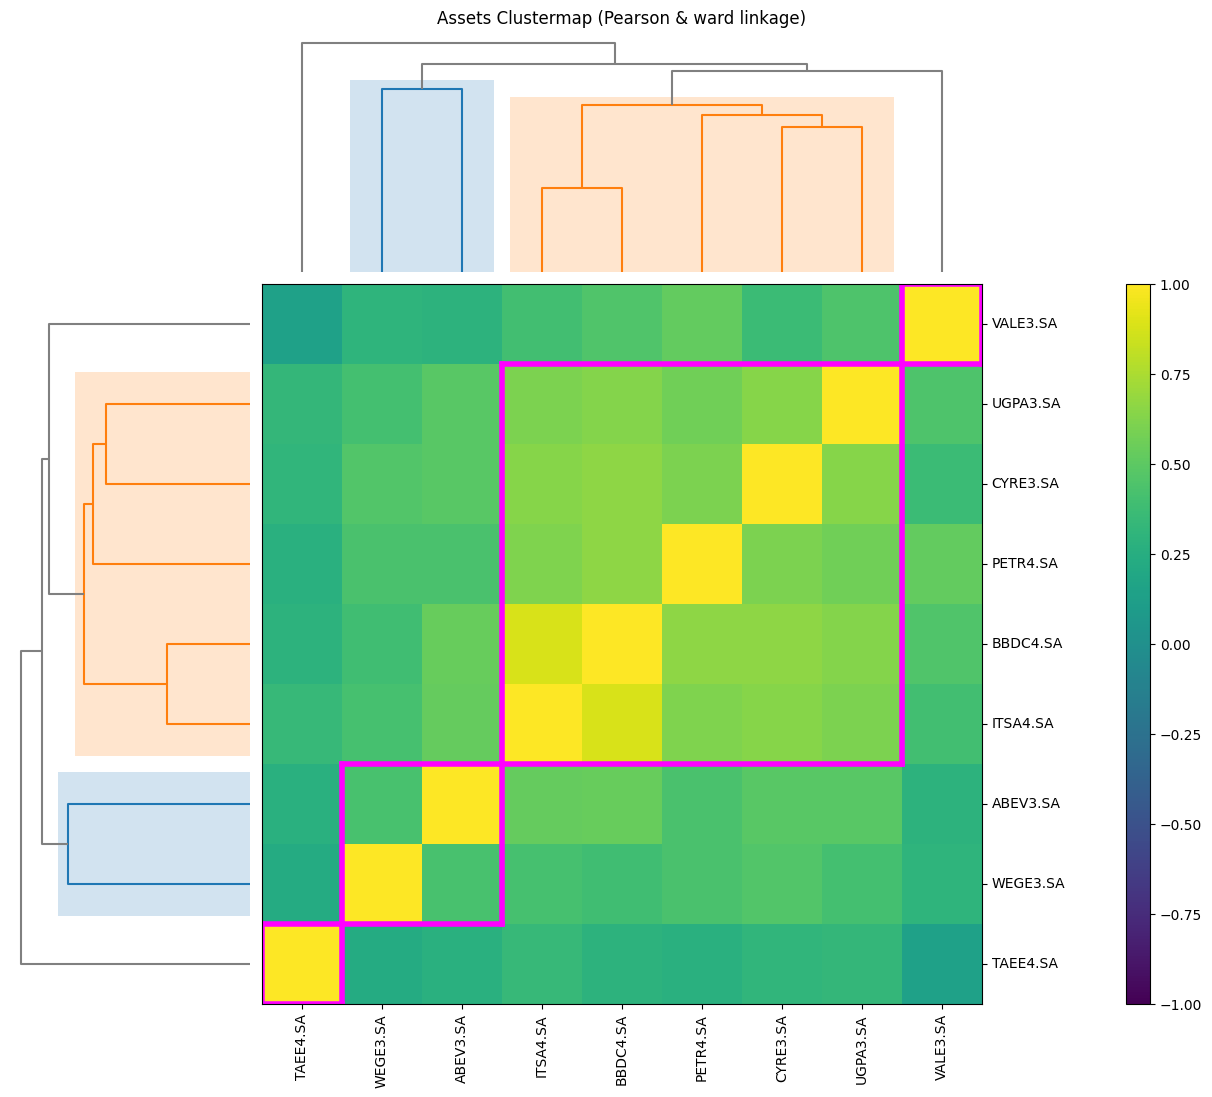

In [18]:
ax = rp.plot_clusters(returns=retornos,
                      codependence='pearson',
                      linkage='ward',
                      k=None,
                      max_k=10,
                      leaf_order=True,
                      dendrogram=True,
                      #linecolor='tab:purple',
                      ax=None)

/usr/local/lib/python3.9/dist-packages/riskfolio/src/PlotFunctions.py:635: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sizes2 = sizes2.append(item)


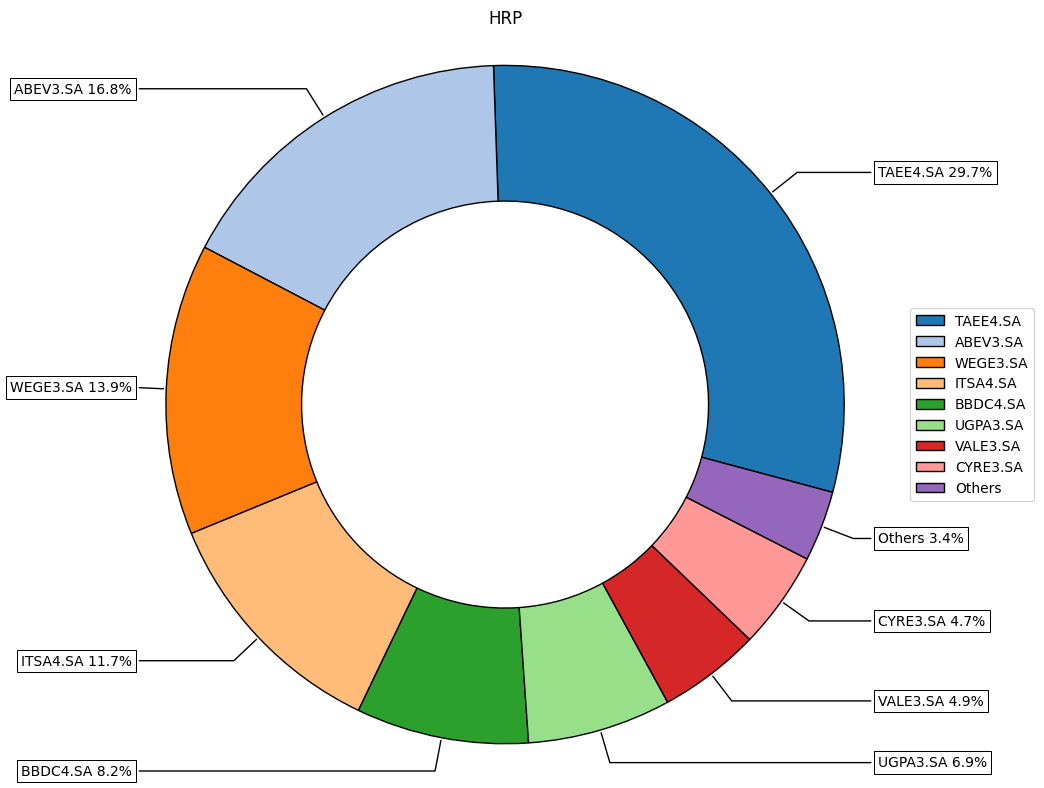

In [23]:
ax = rp.plot_pie(w=w_hrp,
                 title='HRP',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=8,
                 width=10,
                 ax=None)

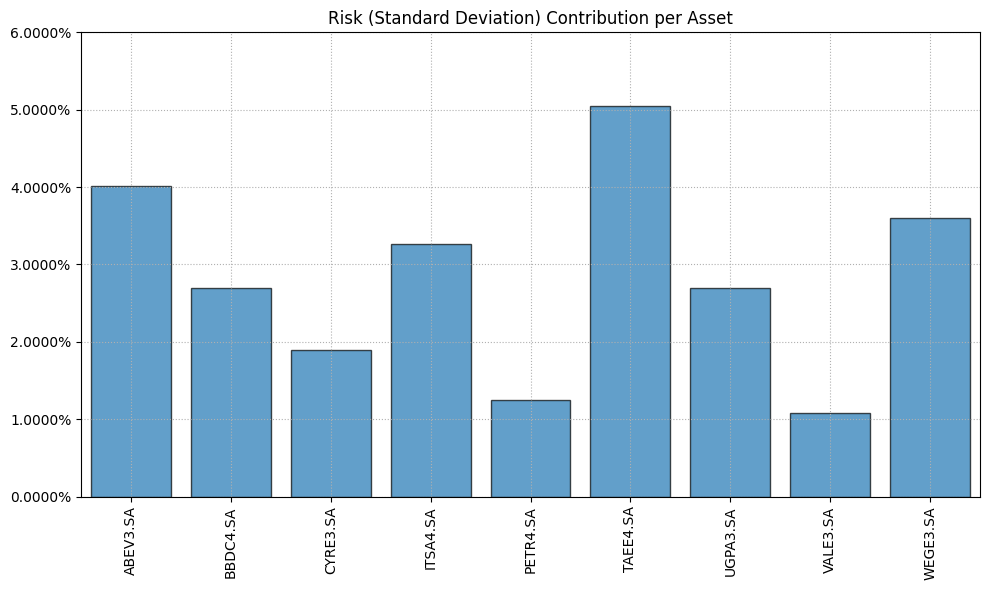

In [25]:
mu = retornos.mean()
cov = retornos.cov() 
returns = retornos

ax = rp.plot_risk_con(w=w_hrp,
                      cov=cov,
                      returns=returns,
                      rm=rm,
                      rf=0,
                      alpha=0.05,
                      color="tab:blue",
                      height=6,
                      width=10,
                      t_factor=252,
                      ax=None)

/usr/local/lib/python3.9/dist-packages/riskfolio/src/PlotFunctions.py:635: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sizes2 = sizes2.append(item)


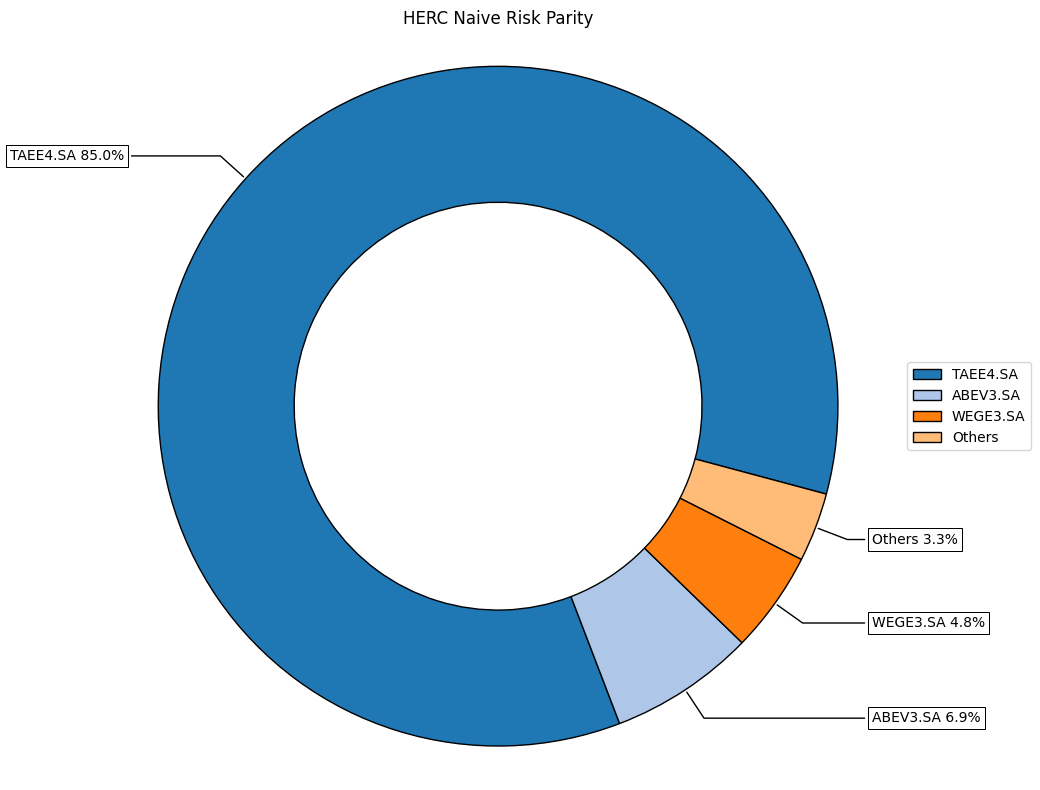

In [26]:
ax = rp.plot_pie(w=w_herc,
                 title='HERC Naive Risk Parity',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=8,
                 width=10,
                 ax=None)

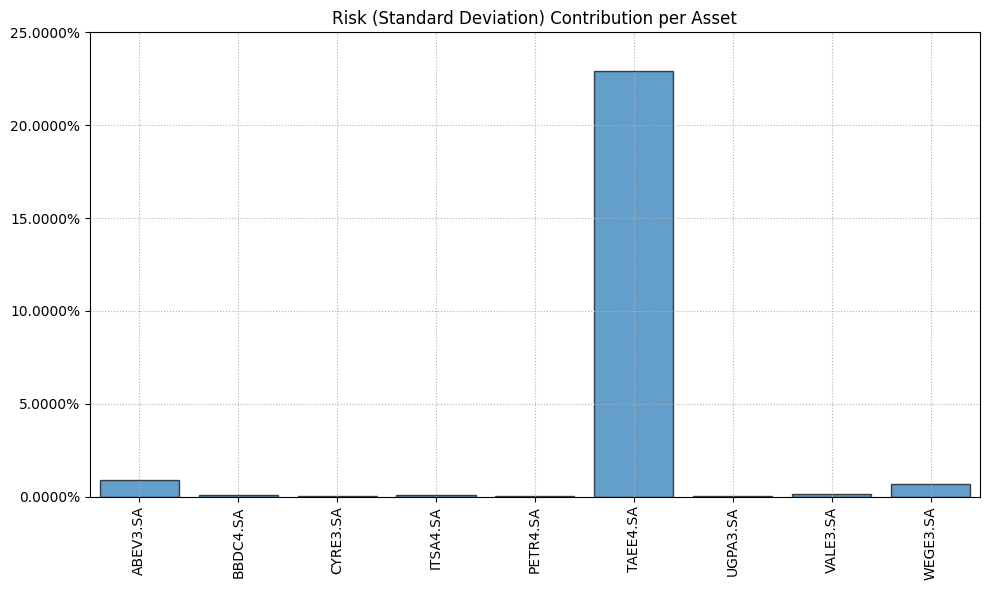

In [27]:
ax = rp.plot_risk_con(w=w_herc,
                      cov=cov,
                      returns=returns,
                      rm=rm,
                      rf=0,
                      alpha=0.05,
                      color="tab:blue",
                      height=6,
                      width=10,
                      t_factor=252,
                      ax=None)

##Beacktesting

In [28]:
#Setup do período out-of-sample

data_inicio = '2021-01-01'
data_fim= '2022-02-28'

carteira2 = yf.download(ativos, start=data_inicio, end=data_fim)['Adj Close']

[*********************100%***********************]  9 of 9 completed


In [30]:
carteira2

,ABEV3.SA,BBDC4.SA,CYRE3.SA,ITSA4.SA,PETR4.SA,TAEE4.SA,UGPA3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,
2021-01-04,14.085717,19.537415,26.252213,8.806289,13.732213,8.742283,22.407991,69.413048,35.984745
2021-01-05,14.385996,19.418289,25.745592,8.737665,14.268963,8.750216,22.222187,70.581818,38.193401
2021-01-06,14.677172,20.061871,25.082376,8.913033,14.297462,8.742283,21.952770,72.896591,39.206112
2021-01-07,14.604377,20.594492,25.238968,9.271382,14.724960,8.543957,22.621666,77.655182,40.826435
2021-01-08,15.041145,20.416946,26.445648,9.248509,14.781960,8.718484,23.206949,77.412323,43.295509
...,...,...,...,...,...,...,...,...,...
2022-02-21,13.726741,17.939333,15.134958,8.651966,19.782068,11.252295,14.363647,76.692650,28.998129
2022-02-22,13.973727,17.871187,15.144580,8.668915,19.717785,11.483387,14.572917,78.022934,29.007952
2022-02-23,14.068723,17.786005,14.855928,8.541805,19.998299,11.687812,14.192424,77.201546,28.094393


In [31]:
w_hrp

,weights
ABEV3.SA,0.167825
BBDC4.SA,0.082205
CYRE3.SA,0.046534
ITSA4.SA,0.116801
PETR4.SA,0.033542
TAEE4.SA,0.297109
UGPA3.SA,0.068514
VALE3.SA,0.048686
WEGE3.SA,0.138784


In [32]:
w_herc

,weights
ABEV3.SA,0.069263
BBDC4.SA,0.004478
CYRE3.SA,0.002535
ITSA4.SA,0.006289
PETR4.SA,0.002726
TAEE4.SA,0.849874
UGPA3.SA,0.002756
VALE3.SA,0.013983
WEGE3.SA,0.048096


In [33]:
#Máscara de pesos

peso = np.array(w_herc.values)
tamanho_herc = np.full_like(carteira2,np.nan)

In [34]:
tamanho_herc

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [35]:
tamanho_herc[0,:] = np.concatenate(peso)
tamanho_herc

array([[0.06926345, 0.0044776 , 0.00253464, ..., 0.00275642, 0.01398329,
        0.04809627],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])

In [43]:
#Máscara do HRP

peso_h = np.array(w_hrp.values)
tamanho_hrp = np.full_like(carteira2, np.nan)
tamanho_hrp[0,:] = np.concatenate(peso_h)
tamanho_hrp

array([[0.1678252 , 0.08220539, 0.04653408, ..., 0.06851359, 0.04868578,
        0.13878425],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])

In [46]:
#Simulação de backesting para HERC

pf_herc = vbt.Portfolio.from_orders(
    close=carteira2,
    size=tamanho_herc,
    size_type='targetpercent',
    group_by=True,
    cash_sharing=True,
)

In [47]:
#Simulação de backesting para HRP

pf_hrp = vbt.Portfolio.from_orders(
    close=carteira2,
    size=tamanho_hrp,
    size_type='targetpercent',
    group_by=True,
    cash_sharing=True,
)

In [48]:
pf_herc.stats()

/usr/local/lib/python3.9/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning: Metric 'sharpe_ratio' requires frequency to be set
  warnings.warn(warning_message)
/usr/local/lib/python3.9/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning: Metric 'calmar_ratio' requires frequency to be set
  warnings.warn(warning_message)
/usr/local/lib/python3.9/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning: Metric 'omega_ratio' requires frequency to be set
  warnings.warn(warning_message)
/usr/local/lib/python3.9/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning: Metric 'sortino_ratio' requires frequency to be set
  warnings.warn(warning_message)


Start                         2021-01-04 00:00:00
End                           2022-02-25 00:00:00
Period                                        287
Start Value                                 100.0
End Value                              128.127194
Total Return [%]                        28.127194
Benchmark Return [%]                    -1.811067
Max Gross Exposure [%]                      100.0
Total Fees Paid                               0.0
Max Drawdown [%]                        13.064336
Max Drawdown Duration                       176.0
Total Trades                                    9
Total Closed Trades                             0
Total Open Trades                               9
Open Trade PnL                          28.127194
Win Rate [%]                                  NaN
Best Trade [%]                                NaN
Worst Trade [%]                               NaN
Avg Winning Trade [%]                         NaN
Avg Losing Trade [%]                          NaN


In [49]:
pf_hrp.stats()

/usr/local/lib/python3.9/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning: Metric 'sharpe_ratio' requires frequency to be set
  warnings.warn(warning_message)
/usr/local/lib/python3.9/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning: Metric 'calmar_ratio' requires frequency to be set
  warnings.warn(warning_message)
/usr/local/lib/python3.9/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning: Metric 'omega_ratio' requires frequency to be set
  warnings.warn(warning_message)
/usr/local/lib/python3.9/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning: Metric 'sortino_ratio' requires frequency to be set
  warnings.warn(warning_message)


Start                         2021-01-04 00:00:00
End                           2022-02-25 00:00:00
Period                                        287
Start Value                                 100.0
End Value                              104.207758
Total Return [%]                         4.207758
Benchmark Return [%]                    -1.811067
Max Gross Exposure [%]                      100.0
Total Fees Paid                               0.0
Max Drawdown [%]                        17.067676
Max Drawdown Duration                       182.0
Total Trades                                    9
Total Closed Trades                             0
Total Open Trades                               9
Open Trade PnL                           4.207758
Win Rate [%]                                  NaN
Best Trade [%]                                NaN
Worst Trade [%]                               NaN
Avg Winning Trade [%]                         NaN
Avg Losing Trade [%]                          NaN


In [50]:
pf_hrp.plot().show()

/usr/local/lib/python3.9/dist-packages/vectorbt/generic/plots_builder.py:339: UserWarning: Subplot 'orders' does not support grouped data
  warnings.warn(warning_message)
/usr/local/lib/python3.9/dist-packages/vectorbt/generic/plots_builder.py:339: UserWarning: Subplot 'trade_pnl' does not support grouped data
  warnings.warn(warning_message)


In [52]:
pf_herc.plot().show()

/usr/local/lib/python3.9/dist-packages/vectorbt/generic/plots_builder.py:339: UserWarning:

Subplot 'orders' does not support grouped data

/usr/local/lib/python3.9/dist-packages/vectorbt/generic/plots_builder.py:339: UserWarning:

Subplot 'trade_pnl' does not support grouped data



In [53]:
pf_herc.drawdowns.plot(top_n=3).show()

In [54]:
pf_hrp.drawdowns.plot(top_n=3).show()

In [55]:
#HERC
pf_herc.plot_underwater().show()

In [56]:
#HRP
pf_hrp.plot_underwater().show()